In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
# from labellines import labelLine, labelLines
from matplotlib.gridspec import GridSpec
from netCDF4 import Dataset as NetCDFFile 
import matplotlib
# from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
import cartopy
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader
from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid
import geopandas as gpd
# import pygeos
# Import modules
import xarray as xr
import matplotlib.ticker as mticker
import datetime
from matplotlib.dates import (AutoDateLocator, YearLocator, MonthLocator,
                              DayLocator, WeekdayLocator, HourLocator,
                              MinuteLocator, SecondLocator, MicrosecondLocator,
                              RRuleLocator, rrulewrapper, MONTHLY,
                              MO, TU, WE, TH, FR, SA, SU, DateFormatter,
                              AutoDateFormatter, ConciseDateFormatter)
from pathlib import Path
import scipy.interpolate as spi
import math
# from mpmath import sec
from joblib import Parallel, delayed
from tqdm import tqdm

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

/Users/weitao/anaconda3/lib/python3.10/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


/var/folders/4y/knznw84s4p5d2d77tb6wyq6h0000gn/T/ipykernel_24073/182240181.py:6: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.15, hspace=0.1,top=0.93)


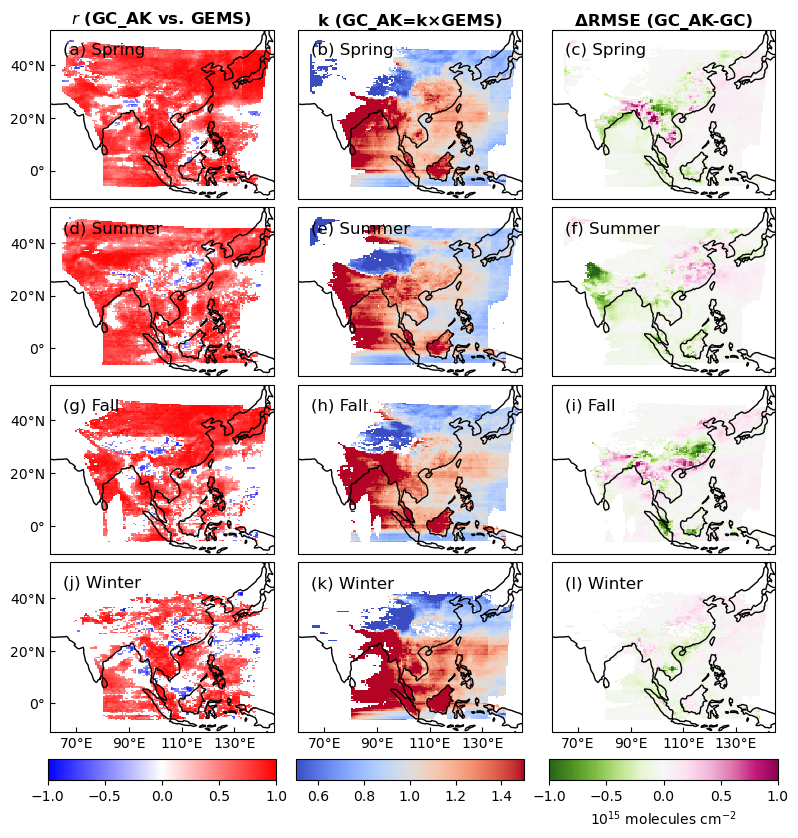

In [2]:
cm = 1/2.54  # centimeters in inches
plt.rcParams['figure.dpi']=600
plt.style.use('default')

fig = plt.figure(layout="constrained", figsize=(20*cm, 21*cm))
plt.subplots_adjust(wspace=0.15, hspace=0.1,top=0.93)
alp = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

gs = GridSpec(5, 3, figure=fig, height_ratios=[4, 4, 4,4, 0.5])

bx1 = fig.add_subplot(gs[4, 0])
bx2 = fig.add_subplot(gs[4, 1])
bx3 = fig.add_subplot(gs[4, 2])

ax1 = fig.add_subplot(gs[0, 0], projection=cartopy.crs.PlateCarree())
ax2 = fig.add_subplot(gs[0, 1], projection=cartopy.crs.PlateCarree())
ax3 = fig.add_subplot(gs[0, 2], projection=cartopy.crs.PlateCarree())

ax4 = fig.add_subplot(gs[1, 0], projection=cartopy.crs.PlateCarree())
ax5 = fig.add_subplot(gs[1, 1], projection=cartopy.crs.PlateCarree())
ax6 = fig.add_subplot(gs[1, 2], projection=cartopy.crs.PlateCarree())

ax7 = fig.add_subplot(gs[2, 0], projection=cartopy.crs.PlateCarree())
ax8 = fig.add_subplot(gs[2, 1], projection=cartopy.crs.PlateCarree())
ax9 = fig.add_subplot(gs[2, 2], projection=cartopy.crs.PlateCarree())

ax10 = fig.add_subplot(gs[3, 0], projection=cartopy.crs.PlateCarree())
ax11 = fig.add_subplot(gs[3, 1], projection=cartopy.crs.PlateCarree())
ax12 = fig.add_subplot(gs[3, 2], projection=cartopy.crs.PlateCarree())

axs = [ax1, ax2, ax3, ax4, # R
       ax5, ax6, ax7, ax8, # Slope
       ax9, ax10, ax11, ax12, # R2
      ]
bxs = [bx1, bx2, bx3]

lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()

seasons = ['Spring','Summer','Fall','Winter']

vminLis = [-1, 0.5, -1] # r, slope, RMSE
vmaxLis = [1, 1.5, 1] # r, slope, RMSE
cmapLis = ['bwr','coolwarm','PiYG_r']

count = 0
for ss in seasons:
    corrData = pd.read_pickle('GEOS-Chem/CorrelationGC_GEMS/SeasonalGEMS_GC_R3_'+ss)
    corrData = corrData.dropna()
    corrData = corrData[corrData['count']>11]
    corrData['RMSE2_without'] = corrData['RMSE2_without']/1e15

    corrData['delta']=corrData['RMSE']-corrData['RMSE2_without']
    count2 =0
    for vari in ['r_AK','slope','delta']:
        
        try:
            
            if (ss!='Winter'):
                if (vari!='r_AK'):
                    corrDataX = corrData[corrData['p']<0.05]
                    corrDataX = corrDataX[corrDataX['R2']>0.9] 
                    
                else:
                    corrDataX = corrData[corrData['p_r']<0.05]
#                     corrDataX = corrDataX[corrDataX['r_AK']>0.8] 
                corrDataX = corrDataX[(corrDataX['season']==ss)&(corrDataX['count']>14)].set_index(['lat','lon']).to_xarray()
                               
            else:
                if (vari!='r_AK'):
                    corrDataX = corrData[corrData['p']<0.05]
                    corrDataX = corrDataX[corrDataX['R2']>0.9] 
                else:
                    corrDataX = corrData[corrData['p_r']<0.05]
                corrDataX = corrDataX[corrDataX['season']==ss].set_index(['lat','lon']).to_xarray()
#             if (vari=='')
            im = corrDataX[vari].plot(ax=axs[count],transform = ccrs.PlateCarree()
    #                              ,vmin = 15, vmax = 24 # Count
                                ,vmin = vminLis[count2], vmax = vmaxLis[count2] ,cmap = cmapLis[count2]
    #                                      levels=[00.4, 0.6, 0.8, 1,1.2]         
                                       
    #                                  ,cmap = "Spectral_r"                                                                 
    #                              ,colors = ["blue", "dodgerblue", "skyblue", "white",  "yellow", "darkorange"
    #                                       ,  "red"] 
    #                             ,colors = ["blue",  "skyblue", "white",  "yellow",  "red"]                              
    #                                  ,levels=[-1, -0.8, -0.6, 0.6, 0.8, 1]      
    #                                  ,levels=[-1, 0, 0.1,0.2,0.3,0.4,0.5, 0.6,0.7, 0.8,0.9, 1]                                                                                                        
    #                                  ,levels=[-1, -0.8, -0.6, -0.0001, 0.0001, 0.6, 0.8, 1]       

                                 ,add_colorbar=False
                                         ,zorder=0
                                )
            if (count2!=2):
                cbar = fig.colorbar(im, cax=bxs[count2], orientation='horizontal')
            else:
                cbar = fig.colorbar(im, cax=bxs[count2], orientation='horizontal', label = '10$^{15}$ molecules cm$^{-2}$')
                


        except:
            print('0')
        try:
#             extent = [114, 115, 22, 23]
            extent = [60, 145, -8, 45]
            axs[count].set_xlabel('', labelpad = 0.1,color='white')
            axs[count].set_ylabel('', labelpad = 0.1,color='white')
            axs[count].add_feature(cfeature.COASTLINE, linewidth=1)
#             axs[count].add_feature(cfeature.OCEAN ,zorder=1,color='white')
            
            axs[count].set_extent(extent)
            axs[count].tick_params(axis='both', which='major', labelsize=10, direction = 'in',color='black')
    #         axs[count].set_facecolor("black")
            if count==0 or count==3 or count==6 or count==9:
                axs[count].set_yticks(np.arange(0,51,20), crs=ccrs.PlateCarree())
                axs[count].yaxis.set_major_formatter(lat_formatter)

            if count==9 or count==10 or count==11:
                axs[count].set_xticks(np.arange(70,135,20), crs=ccrs.PlateCarree())
                axs[count].xaxis.set_major_formatter(lon_formatter)
        #         axs[i,j].set_frame_on(False)
            axs[count].bbox_inches="tight"
            axs[count].text(0.06,0.85,'('+alp[count]+') '+ss,transform=axs[count].transAxes,size=12)
#             axs[count].text(0.1,0.1,ss,transform =axs[count].transAxes)
            count = count + 1
            count2 = count2 + 1
        except:
            continue
# lb = ['100% Lower', '50% Lower', '20% Lower', '20% Higher', '50% Higher', '100% Higher'  ]
# lb = ['-1', '-0.8', '-0.6', 'NA', 'NA', '0.6', '0.8', '1'  ]
# lb = ['-1', '-0.8', '-0.6', '0.6', '0.8', '1'  ]
ax1.set_title('$\it{r}$ (GC_AK vs. GEMS)', pad = 0, fontsize=12, weight = 'bold')
ax2.set_title('k (GC_AK=k×GEMS)', pad = 0, fontsize=12, weight = 'bold')
ax3.set_title(u'ΔRMSE (GC_AK-GC)', pad = 0, fontsize=12, weight = 'bold')


# cbar = fig.colorbar(im, cax=bx2, orientation='horizontal',label='GEMS, GC Correlations')
# cbar = fig.colorbar(im, cax=bx3, orientation='horizontal',label='GEMS, GC Correlations')
# cbar.set_ticklabels(lb)
# plt.suptitle('Statistics of Diurnal HCHO between GEOS-Chem and GEMS' , size =13, weight = 'bold')

plt.rcParams['figure.dpi']=600
plt.rcParams['figure.constrained_layout.use'] = True